# Quick Reference

In [ ]:
# column deets
data_dic = pd.read_excel('LCDataDictionary.xlsx')

# Log

Shape: (37745, 103)

1. Drop 'member_id', 'url', 'desc' because all are nan
2. Dropped all nans from'all_util', 'avg_cur_bal', 'dti_joint', 'pct_tl_nvr_dlq', 'revol_util' because there we so few of them and they didn't represent zero values

In [159]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)

import seaborn as sns
import matplotlib as plt
plt.style.use('dark_background')

In [207]:
df = pd.read_csv('train_features.csv')
dd = pd.read_excel('LCDataDictionary.xlsx')

### Begin exploration

In [66]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method
0,43373,NaN,12000,12000,36 months,16.02%,422.01,C,C5,Driver,4 years,MORTGAGE,81000.0,NaN,NaN,debt_consolidation,Debt consolidation,280xx,NC,12.76,0,Dec-2005,1,48.0,NaN,7,0,4912,23.5%,15,w,0,48.0,Individual,NaN,NaN,0,0,174783,1,2,0,4,13.0,33668,82.0,2,5,2962,63.0,20900,1,1,2,9,24969.0,588.0,89.3,0,0,145.0,23,1,1,1,8.0,NaN,1.0,NaN,2,2,2,2,2,9,4,5,2,7,0.0,0,0,2,92.9,100.0,0,0,206618,38580,5500,40863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
1,24414,NaN,6300,6300,36 months,14.07%,215.54,C,C3,GMP Lead,4 years,RENT,39000.0,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,21.42,0,Mar-2012,1,NaN,NaN,10,0,11876,59.4%,12,w,0,NaN,Individual,NaN,NaN,0,0,31046,0,1,0,2,14.0,19170,83.0,3,8,5153,72.0,20000,1,0,1,10,3105.0,6877.0,59.3,0,0,17.0,72,8,8,0,8.0,NaN,6.0,NaN,0,6,7,7,8,2,9,10,7,10,0.0,0,0,3,100.0,42.9,0,0,43140,31046,16900,23140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash


In [67]:
df.shape

(37745, 103)

In [104]:
nulls_df = pd.DataFrame(df.isna().sum())
# show number of nulls for each feature
dd1 = data_dic.merge(nulls_df, left_on='LoanStatNew', right_on=nulls_df.index)
# show ratio of null values for each feature
dd1['ratio'] = dd1[0]/len(df)
# show your data horizontally so that it's not a pain to scroll through
dd1.T

### Understanding our nulls
Notes:

* (index number for dd1) Description


<font color=red>0 > 100: (These will be dropped) </font>
    
```'all_util', 'avg_cur_bal', 'dti_joint', 'pct_tl_nvr_dlq','revol_util'```

* (3) Balance to credit limit on all trades
* (7) Average current balance of all accounts
* (15)...total monthly debt payments on the total debt obligations
* (66) Percent of trades never delinquent
* (72) Revolving line utilization rate

### 100 > 1500:

``` 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mths_since_rcnt_il',
'mths_since_recent_bc', 'num_tl_120dpd_2m', 'percent_bc_gt_75' ```

* (8) Total open to buy on revolving bankcards
    * Nulls not zero
    * Value is continuous from 0 to over 100k. Distplot shows heavy weighting to zero, so let's try 0
* (9) Ratio of total current balance to high credit/credit limit for all bankcard accounts.
    * Nulls not zero
    * Continuous from 0 to 100, lots at both 0 and 100, let's try 0
* <font color=cyan>(32) Months since oldest bank installment account opened</font>
    * <font color=cyan>_!!!Nulls might be zero!!!_</font>
    * Continuous, let's try the extreme: 445 (444 is the current max)
* (40) Months since most recent installment accounts opened (note: this is the same number of nans as (32))
    * Nulls not zero
    * Continuous, let's try the extreme: 327 (326 is the current max)
* (41) Months since most recent bankcard account opened
    * Nulls not zero, may mean no card opened
    * Continuous, let's try this at the extreme: 535 (534 is the current max)
* <font color=red>(55) Number of accounts currently 120 days past due (updated in past 2 months)</font>
    * Something weird going on with value counts (only showing 4.7k values and all are zero?)
    * Nulls not zero
* (67) Percentage of all bankcard accounts > 75% of limit
    * Nulls not zero
    * May mean that they don't have any bank card accounts. Let's make this one 0

### 1500 > 7000:

`'emp_length', 'emp_title', 'il_util', 'mths_since_recent_inq'`

* <font color=cyan>(17) Employment length in years</font>
    * <font color=cyan>_Strings like "3 years". Has a "< 1 year" options. Nulls may be zero years. Treat as own category_</font>
    * convert to numeric, make < 1 year = .5 and Nans 0
* <font color=cyan>(18) The job title supplied by the Borrower when applying for the loan</font>
    * <font color=cyan>No "jobless" option here, so nulls likely jobless. Treat as own category</font>
    * fill nans with "jobless"
* <font color=cyan>(23) Ratio of total current balance to high credit/credit limit on all install acct</font>
    * <font color=cyan> No zero option. Nulls may be either a ratio of zero, or no outstanding balance. Treat as own category </font>
* (43) Months since most recent inquiry.
    * Nulls not zero. Treat as own category

### Mostly Nan:

```'annual_inc_joint', 'dti_joint', 'mths_since_last_delinq', 
'mths_since_last_major_derog', 'mths_since_last_record', 
'mths_since_recent_bc_dlq', 'sec_app_open_act_il'```

* <font color=cyan>(5) The combined self-reported annual income provided by the co-borrowers during registration</font>
    * <font color=cyan>No zero values, so nulls may be zero</font>
    * unclear on what this means - either zero or not reported. Will try 1) dropping 2) imputing zero with nan column, 3) imputing mean with a nan column
    
* <font color=cyan>(15) A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations</font>
    * <font color=cyan>No zero values, so nulls may be zero</font>
    * unclear on what this means - either zero or not reported. Will try 1) dropping 2) imputing zero with nan column, 3) imputing mean with a nan column

* <font color=cyan>(37) The number of months since the borrower's last delinquency</font>
    * <font color=cyan>No zero values, so nulls may be zero</font>
    * unclear on what this means - either zero or not reported. Will try 1) dropping 2) imputing zero with nan column, 3) imputing mean with a nan column 4) imputing max+1 with nan column (could mean no deliquency)
    
* <font color=cyan>(38) Months since most recent 90-day or worse rating</font>
    * <font color=cyan>No zero values, so nulls may be zero</font>
    * unclear on what this means - either zero or not reported. Will try 1) dropping 2) imputing zero with nan column, 3) imputing mean with a nan column 4) imputing max+1 with nan column (could mean no deliquency)
    
* <font color=cyan>(39) The number of months since the last public record</font>
    * <font color=cyan>No zero values, so nulls may be zero</font>
    * unclear on what this means - either zero or not reported. Will try 1) dropping 2) imputing zero with nan column, 3) imputing mean with a nan column 4) imputing max+1 with nan column (could mean no deliquency)
    
* <font color=cyan>(42) Months since most recent bankcard delinquency</font>
    * <font color=cyan>No zero values, so nulls may be zero</font>
    * unclear on what this means - either zero or not reported. Will try 1) dropping 2) imputing zero with nan column, 3) imputing mean with a nan column 4) imputing max+1 with nan column (could mean no deliquency)
    
* <font color=cyan>(44) Months since most recent revolving delinquency</font>
    * <font color=cyan>No zero values, so nulls may be zero</font>

* (87) Number of currently active installment trades at time of application for the secondary applicant
    * Nulls not zero. Treat as own category
    * No idea, let's go ahead and drop this column

### Dictionary

In [105]:
dd1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88
LoanStatNew,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,loan_amnt,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,zip_code,sec_app_open_act_il,disbursement_method
Description,The number of accounts on which the borrower is now delinquent.,Number of trades opened in past 24 months.,The state provided by the borrower in the loan application,Balance to credit limit on all trades,The self-reported annual income provided by the borrower during registration.,The combined self-reported annual income provided by the co-borrowers during registration,Indicates whether the loan is an individual application or a joint application with two co-borrowers,Average current balance of all accounts,Total open to buy on revolving bankcards.,Ratio of total current balance to high credit/credit limit for all bankcard accounts.,Number of charge-offs within 12 months,Number of collections in 12 months excluding medical collections,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years,The past-due amount owed for the accounts on which the borrower is now delinquent.,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.","A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income",The month the borrower's earliest reported credit line was opened,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.,The job title supplied by the Borrower when applying for the loan.*,The total amount committed to that loan at that point in time.,LC assigned loan grade,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER",A unique LC assigned ID for the loan listing.,Ratio of total current balance to high credit/credit limit on all install acct,"The initial listing status of the loan. Possible values are – W, F",Number of personal finance inquiries,Number of credit inquiries in past 12 months,The number of inquiries in past 6 months (excluding auto and mortgage inquiries),The monthly payment owed by the borrower if the loan originates.,Interest Rate on the loan,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, th

### Drop Values

In [110]:
# all of these are nulls, so drop them
df = df.drop(['member_id', 'url', 'desc'], axis=1)

In [111]:
# drop all nans because they are so few of them and they don't
# represent zero values
df = df.dropna(subset=['all_util', 'avg_cur_bal', 'dti_joint', 'pct_tl_nvr_dlq', 'revol_util'])

### Explore 100 > 1500

In [183]:
# bc_open_to_buy, bc_util, mo_sin_old_il_acct, mths_since_rcnt_il,
# mths_since_recent_bc, num_tl_120dpd_2m, percent_bc_gt_75
df.num_tl_120dpd_2m.isin([0]).sum()

4728

In [ ]:
df.percent_bc_gt_75.value_counts()

In [184]:
df.num_tl_120dpd_2m.max()

0.0

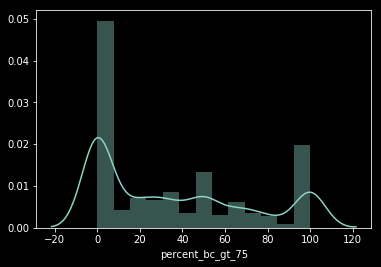

In [188]:
sns.distplot(df.percent_bc_gt_75.dropna())

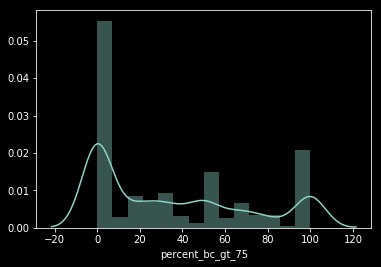

In [189]:
sns.distplot(df.percent_bc_gt_75.fillna(0))

### Explore 1500 > 7000

In [137]:
# 'emp_length', 'emp_title', 'il_util', 'mths_since_recent_inq'
df.mths_since_recent_inq.isin([0]).sum()

381

In [ ]:
df.il_util.value_counts()

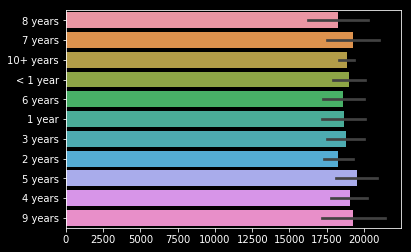

In [193]:
# for categoricals
sns.barplot(x=df.emp_length.dropna().index, y=df.emp_length.dropna().values)

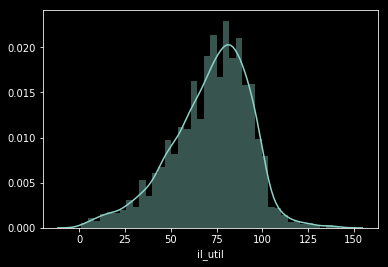

In [198]:
sns.distplot(df.il_util.dropna())

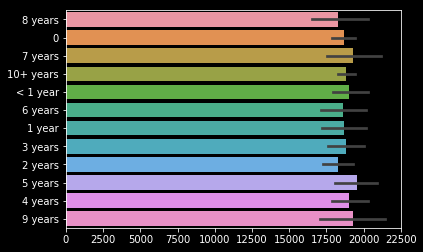

In [197]:
sns.barplot(x=df.emp_length.fillna(0).index, y=df.emp_length.fillna(0).values)

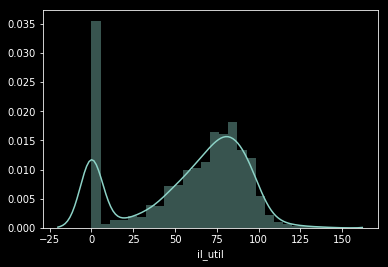

In [199]:
sns.distplot(df.il_util.fillna(0))

### Explore mostly NaN

In [204]:
# 'annual_inc_joint', 'dti_joint', 'mths_since_last_delinq', 
# 'mths_since_last_major_derog', 'mths_since_last_record', 
# 'mths_since_recent_bc_dlq', 'sec_app_open_act_il'
df.annual_inc_joint.isin([0]).sum()

0

In [ ]:
df.annual_inc_joint.value_counts()

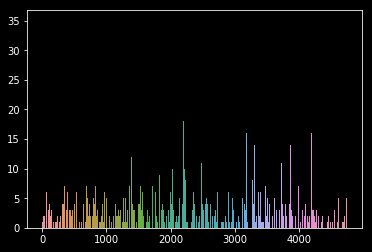

In [224]:
sns.barplot(x=df.sec_app_open_act_il.dropna().index, y=df.sec_app_open_act_il.dropna().values)

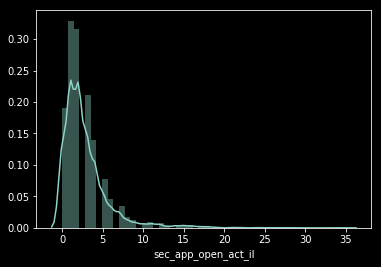

In [225]:
sns.distplot(df.sec_app_open_act_il.dropna())

In [ ]:
sns.barplot(x=df.emp_length.fillna(0).index, y=df.emp_length.fillna(0).values)

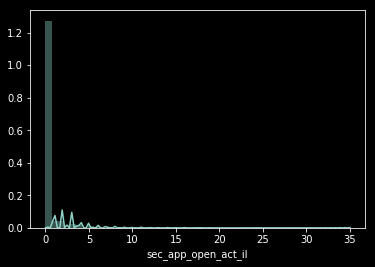

In [226]:
sns.distplot(df.sec_app_open_act_il.fillna(0))

In [208]:
df.isna().sum()

id                                     0    
member_id                              37745
loan_amnt                              0    
funded_amnt                            0    
term                                   0    
int_rate                               0    
installment                            0    
grade                                  0    
sub_grade                              0    
emp_title                              3565 
emp_length                             3277 
home_ownership                         0    
annual_inc                             0    
url                                    37745
desc                                   37745
purpose                                0    
title                                  0    
zip_code                               0    
addr_state                             0    
dti                                    92   
delinq_2yrs                            0    
earliest_cr_line                       0    
inq_last_6

In [291]:
x = df
# Filling Nans
x['bc_open_to_buy'] = x['bc_open_to_buy'].fillna(0)
x['bc_util'] = x['bc_util'].fillna(0)
x['mo_sin_old_il_acct'] = x['mo_sin_old_il_acct'].fillna(445)
x['mths_since_rcnt_il'] = x['mths_since_rcnt_il'].fillna(327)
x['mths_since_recent_bc'] = x['mths_since_recent_bc'].fillna(535)
x = x.drop('num_tl_120dpd_2m', axis=1)
x['percent_bc_gt_75'] = x['percent_bc_gt_75'].fillna(0)
x['emp_length'] = x['emp_length'].fillna(0)
x['emp_title'] = x['emp_title'].fillna('jobless')
x['il_util'] = x['il_util'].fillna(1000)
x['mths_since_recent_inq'] = x['mths_since_recent_inq'].fillna(1000)

# create is nan column
x['annual_inc_joint_nan'] = x['annual_inc_joint'].isna()
x['annual_inc_joint'] = x['annual_inc_joint'].fillna(0)

x['dti_joint_nan'] = x['dti_joint'].isna()
x['dti_joint'] = x['dti_joint'].fillna(0)

x['mths_since_last_delinq_nan'] = x['mths_since_last_delinq'].isna()
x['mths_since_last_delinq'] = x['mths_since_last_delinq'].fillna(0)

x['mths_since_last_major_derog_nan'] = x['mths_since_last_major_derog'].isna()
x['mths_since_last_major_derog'] = x['mths_since_last_major_derog'].fillna(0)

x['mths_since_last_record_nan'] = x['mths_since_last_record'].isna()
x['mths_since_last_record'] = x['mths_since_last_record'].fillna(0)

x['mths_since_last_record_nan'] = x['mths_since_last_record'].isna()
x['mths_since_last_record'] = x['mths_since_last_record'].fillna(0)

x['mths_since_recent_bc_dlq_nan'] = x['mths_since_recent_bc_dlq'].isna()
x['mths_since_recent_bc_dlq'] = x['mths_since_recent_bc_dlq'].fillna(0)

x = x.drop('sec_app_open_act_il', axis=1)

x = x.drop(['member_id','url','desc','annual_inc_joint', 'revol_bal_joint', 'sec_app_earliest_cr_line','sec_app_inq_last_6mths', 'sec_app_mort_acc','sec_app_open_acc', 'sec_app_revol_util', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog'], axis=1)

x['mths_since_recent_revol_delinq_nan'] = x['mths_since_recent_revol_delinq'].isna()
x['mths_since_recent_revol_delinq'] = x['mths_since_recent_revol_delinq'].fillna(0)

In [286]:
#
y = x.dropna()

In [287]:
y.shape

(37599, 94)

### Encoding

In [ ]:
# few values - encode numeric
'term', 'grade', 'home_ownership', 'initial_list_status',
'application_type', 'disbursement_method'

# make numeric
'int_rate', 'emp_length', 'revol_util'

# mean encode
'sub_grade', 'emp_title', 'purpose', 'title', 'zip_code',
'addr_state'

# bin by year
'earliest_cr_line'

In [289]:
#revol_util to numeric
y['revol_util'] = y['revol_util'].str.rstrip('%').astype('float') / 100.0

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [272]:
#int_rate
y['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

In [279]:
x.emp_length.value_counts()
y['emp_length'] = df['emp_length'].str.rstrip([' years','+','<'])

In [280]:
y['emp_length'].value_counts()

Series([], Name: emp_length, dtype: int64)

### Begin Modeling

In [268]:
# 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title'
# 'emp_length', 'home_ownership', 'purpose', 'title',
# 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util',
# 'initial_list_status', 'application_type', 'disbursement_method'
x.disbursement_method.value_counts()

Cash         35303
DirectPay    2442 
Name: disbursement_method, dtype: int64